# Seoul Bike Sharing Demand

# Introduction

Dans le cadre du cours de Python for Data Analysis, il a été demandé de travailler sur un dataset attribué afin de réaliser un travail qui entre dans le contexte de l'étude de ce dataset.

Le dataset qui m'avait été donné initialement était : https://archive.ics.uci.edu/ml/datasets/Taiwanese+Bankruptcy+Prediction

Malheuresement, celui-ci n'étant pas disponible au téléchargement, et avec l'accord de Mr BENJBAUM et Mr JOUIN, j'ai sélectionné un autre dataset pour ce projet : https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand

Ainsi, dans ce notebook vous retrouverez :
- l'exploration et la visualisation des données,
- le pré-traitement et la création de nouvelles variables,
- l'entraînement de différents modèles de prédiction ainsi qu'une comparaison des résultats obtenus,
- l'optimisation du meilleur modèle et les performances obtenus

Suite à ce notebook, seront disponibles : le modèle final retenu disponible dans une API, et un PowerPoint expliquant toute la démarche de l'étude.

# Contexte

Actuellement, la location de vélos est adoptée dans plusieurs villes du monde pour faciliter les déplacements. Il est donc important de rendre cette location disponible et accessible au public au moment désiré et sans attente. Dans certaines villes, la mis à disposition de ces vélos peut devenir un problème majeur en raison de la haute demande. Ainsi la prédiction de la demande en vélos pour chaque heure de la journée est primordial pour satisfaire les habitants d'une ville.

C'est pourquoi ce dataset fournit des informations concernant les conditions métérologiques ainsi que le nombre de vélos loués par heure et par date sur 2017 et 2018.

Dataset : https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand

Ce dataset est disponible à l'adresse suivante : http://data.seoul.go.kr/

Ainsi un article y est consacré, où les auteurs tente de trouver le meilleur modèle de prédiction pour cette problématique : https://www.tandfonline.com/doi/full/10.1080/22797254.2020.1725789

Notre but dans cet étude est d'explorer les données et déterminer les facteurs de la location, trouver un modèle de prédiction que l'on puisse comparer avec ceux de l'article.

# Chargement des données

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [35]:
df = pd.read_csv('SeoulBikeData.csv', delimiter=';')

In [5]:
df

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


# Exploration et Visualisation

### Quels sont les types de nos données ?

In [4]:
df.dtypes

Date                         object
Rented Bike Count             int64
Hour                          int64
Temperature(C)              float64
Humidity(%)                   int64
Wind speed (m/s)            float64
Visibility (10m)              int64
Dew point temperature(C)    float64
Solar Radiation (MJ/m2)     float64
Rainfall(mm)                float64
Snowfall (cm)               float64
Seasons                      object
Holiday                      object
Functioning Day              object
dtype: object

### Création de nouvelles variables

On décide de créer 4 nouvelles variables :
- Year
- Month
- Day
- Day_of_Week
Découper la date nous permet de mieux visualiser la répartition des données, mais également par la suite d'être plus efficace dans nos prédictions

On converti également Date au format datetime

In [45]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Day'] = pd.DatetimeIndex(df['Date']).day
df['Day_of_Week'] = pd.DatetimeIndex(df['Date']).day_name()

In [46]:
df

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day,Day_of_Week
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30,Friday
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30,Friday
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30,Friday
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30,Friday


### Valeurs manquantes ?

In [7]:
df.isna().sum()

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
Year                        0
Month                       0
Day                         0
Day_of_Week                 0
dtype: int64

Pas de NA, cela enlève une charge de pré-traitement et indique que nos données ont été correctement récupérées.

### Sur quelles dates s'étale notre dataset ?

In [8]:
print(df['Date'].sort_values()[0])
print(df['Date'].sort_values()[-1:].iloc[0])

2017-01-12 00:00:00
2018-12-11 00:00:00


### Sur ces dates, combien cela représente-t-il de vélos loués ?

In [9]:
print('Nomre de vélos loués au total entre le 01/12/2017 et le 30/11/2018 : ' + str(df['Rented Bike Count'].sum()))

Nomre de vélos loués au total entre le 01/12/2017 et le 30/11/2018 : 6172314


### Quel est le nombre total de vélos loués selon l'heure de la journée ?

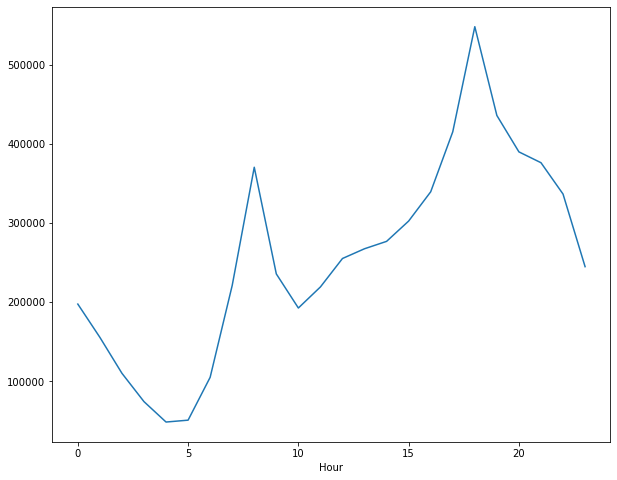

In [8]:
bikeperhour=df.groupby("Hour")['Rented Bike Count'].sum()
bikeperhour.plot(figsize=(10,8))

On remarque que les pics de location sont situés aux heures de pointes. Avec tout de même une augmentation dans l'après-midi.

### Quel est le nombre total de vélos loués selon le mois de l'année ?

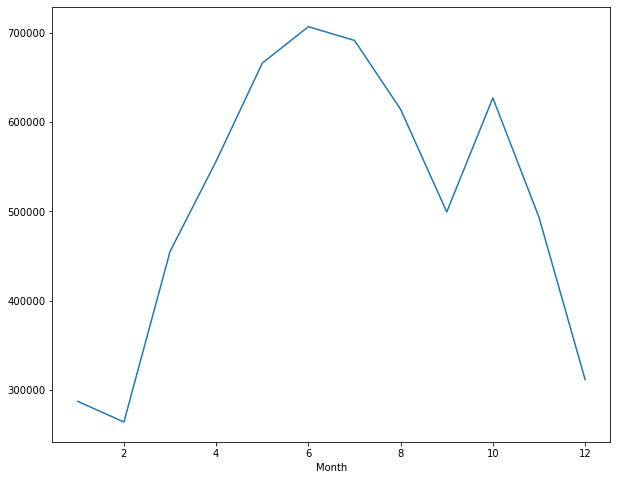

In [42]:
bikepermonth=df.groupby("Month")['Rented Bike Count'].sum()
bikepermonth.plot(figsize=(10,8))

Un plus grand nombre de vélos loués durant l'été et juste avant l'hiver

### Quel est le nombre total de vélos loués selon le jour de la semaine ?

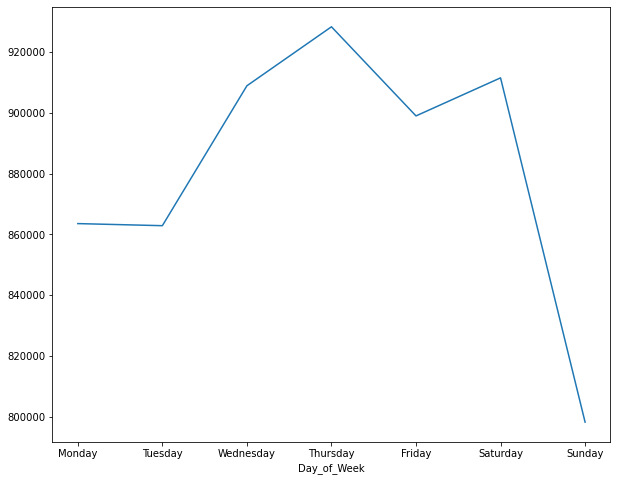

In [43]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
bikeperdayweek=df.groupby("Day_of_Week")['Rented Bike Count'].sum().reindex(days) 
bikeperdayweek.plot(figsize=(10,8), sort_columns = 'TRUE')

On remarque que le dimanche il y a beaucoup moins de vélos loué contrairement au reste de la semaine, ce qu'il laisse penser que la plupart des locations concernent le déplacement entre le domicile et le lieu d'activité.

### BoxPlot selon le mois de l'année

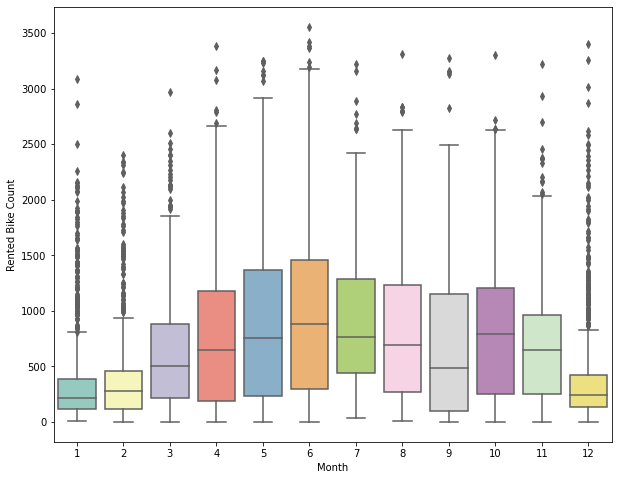

In [44]:
plt.figure(figsize = (10,8))
sns.boxplot(x="Month", y="Rented Bike Count", data=df, palette="Set3")
plt.show()

Ici, on retrouve des chiffres moins important pour les mois d'hiver.

### BoxPlot selon la saison

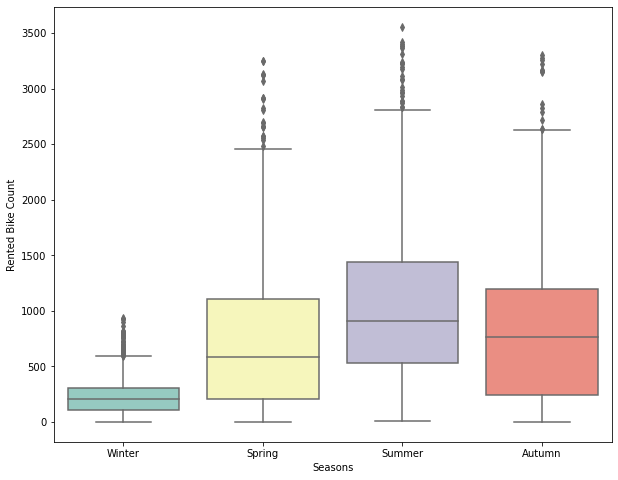

In [12]:
plt.figure(figsize = (10,8))
sns.boxplot(x=df['Seasons'],y=df['Rented Bike Count'], palette="Set3")
plt.show()

On peut confirmer la supposition précédente qui indique qu'il y a beaucoup moins de location durant l'hiver et légèrement plus durant l'été. Le printemps et l'automne sont quasi semblable.

### BoxPlot selon les vacances

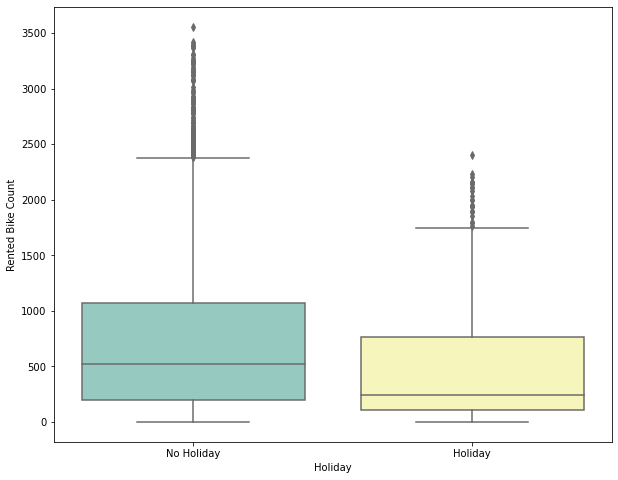

In [13]:
plt.figure(figsize = (10,8))
sns.boxplot(x=df['Holiday'],y=df['Rented Bike Count'], palette="Set3")
plt.show()

Ce graphe confirme que la location de vélo concerne principalement les déplacements entre le domicile et le lieu d'activité, malgré cela la proportion de location pendant les vacances reste importante.

### Quel est le nombre total de vélos loués selon le jour de la semaine selon si c'est les vacances ou non ?

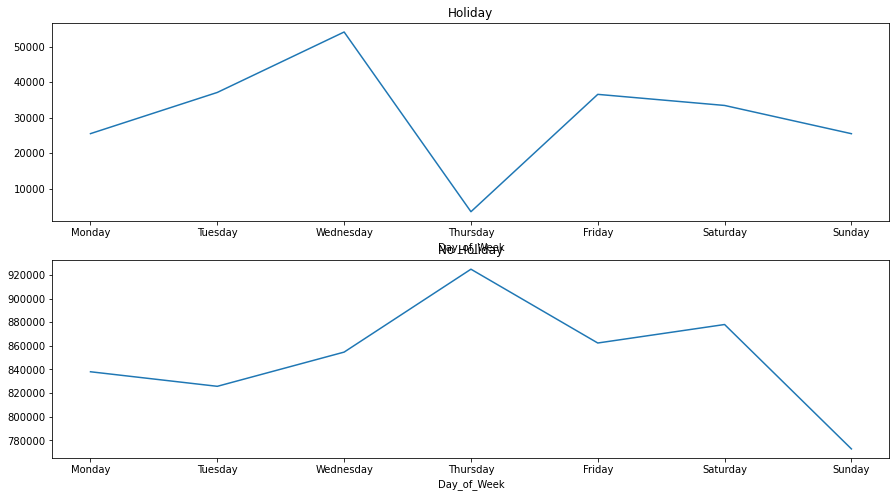

In [38]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
bikeperdayholiday=df[df['Holiday'] == 'Holiday'].groupby("Day_of_Week")['Rented Bike Count'].sum().reindex(days)
bikeperdaynoholiday=df[df['Holiday'] == 'No Holiday'].groupby("Day_of_Week")['Rented Bike Count'].sum().reindex(days)
fig, axes = plt.subplots(2, 1, figsize=(15, 8)) 
bikeperdayholiday.plot(ax=axes[0], sort_columns = 'TRUE', title = 'Holiday')
bikeperdaynoholiday.plot(ax=axes[1], sort_columns = 'TRUE', title = 'No Holiday')

Ce que l'on remarque c'est que le nombre de vélos loué du vendredi au dimanche pendant les vacances varie peu alors que lorsque les vacances sont finis il diminue largement le dimanche.
On remarque aussi qu'en mileu de semaine le nombre à tendance à augmenter hors vacances contrairement à l'inverse.

### Quel est la proportion d'heures où la location fonctionne selon le mois de l'année?

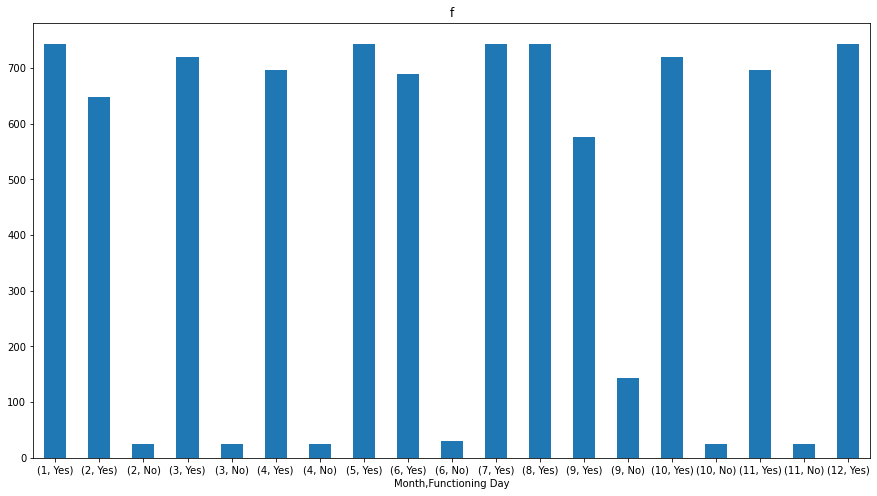

In [15]:
funcpermonth=df.groupby("Month")['Functioning Day'].value_counts()
funcpermonth.plot(figsize=(15, 8), kind='bar', rot=0, title='f')

On peut remarquer que le non-fonctionnement de la location est assez rare et qu'il correspond sans doute à des journées de manutention ou de problèmes de fonctionnement.

### Proportion de jour où la location fonctionne

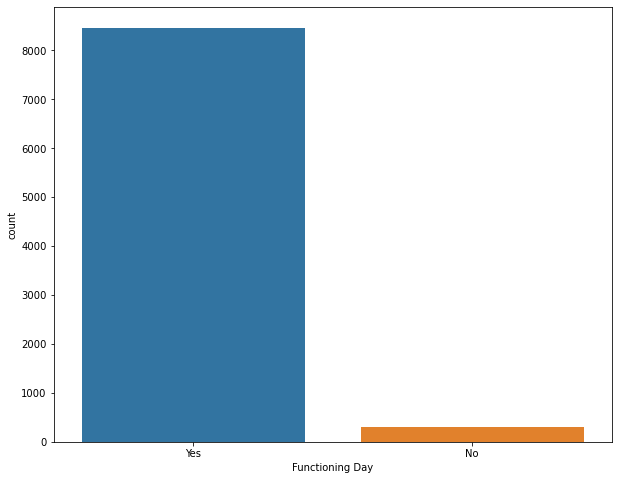

In [16]:
plt.figure(figsize = (10,8))
sns.countplot(data = df, x = 'Functioning Day')
plt.show()

Ce graphe confirme qu'il y a très peu d'heures où la location ne fonctionne pas, ainsi la quasi totalité du temps, les vélos sont disponibles à la location et donc nous avons un grand nombre de données intéressantes pour nos modèles.

### Chute de neige et de pluie selon le mois et l'année

In [17]:
table2017=df[(df.Year==2017)].groupby(['Year', 'Month'])['Rainfall(mm)', 'Snowfall (cm)'].sum()
#table2017['Rainfall(cm)'] = table2017['Rainfall(mm)']/10
#table2017 = table2017.drop(['Rainfall(mm)'], axis = 1)
table2018=df[(df.Year==2018)].groupby(['Year', 'Month'])['Rainfall(mm)', 'Snowfall (cm)'].sum()
#table2018['Rainfall(cm)'] = table2018['Rainfall(mm)']/10
#table2018 = table2018.drop(['Rainfall(mm)'], axis = 1)

<ipython-input-17-84bf2735499f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  table2017=df[(df.Year==2017)].groupby(['Year', 'Month'])['Rainfall(mm)', 'Snowfall (cm)'].sum()
<ipython-input-17-84bf2735499f>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  table2018=df[(df.Year==2018)].groupby(['Year', 'Month'])['Rainfall(mm)', 'Snowfall (cm)'].sum()


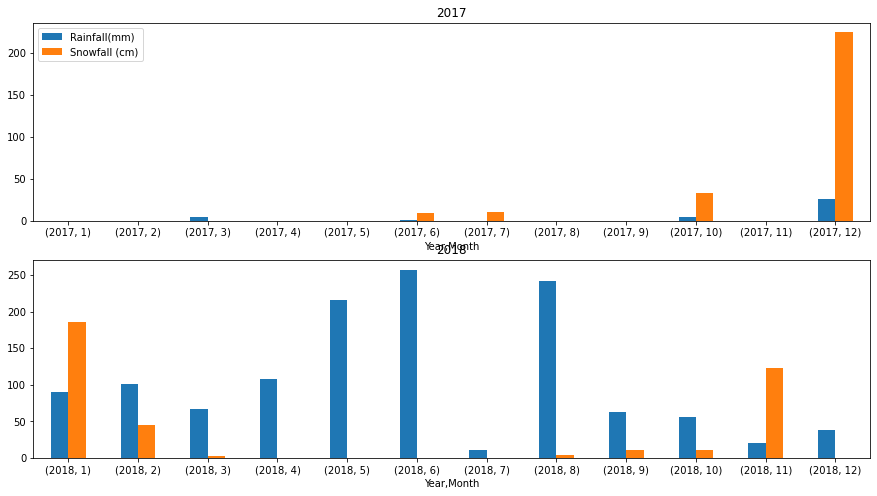

In [18]:
fig, axes = plt.subplots(2, 1, figsize=(15, 8))
table2017.plot(kind='bar', rot=0, ax=axes[0], title='2017')
table2018.plot(kind='bar', rot=0, ax=axes[1], title='2018', legend=False)

On peut remarquer que les conditions métérologiques étaient bien plus mauvaises en 2018.

### Nombre total de vélos loués selon la visibilité, inférieure à 20000 m (stade normal)

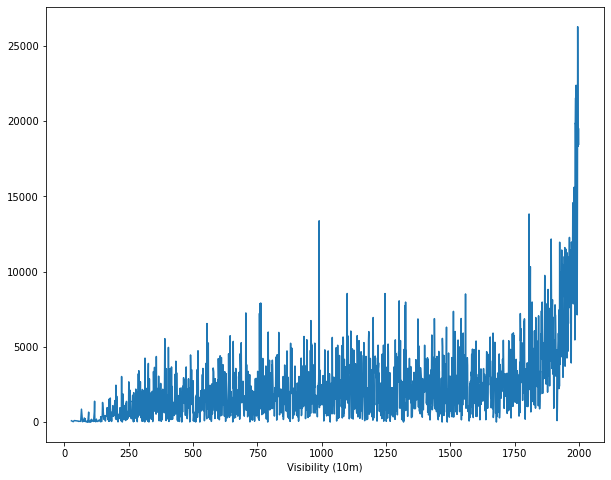

In [40]:
bikepervisibility=df[df['Visibility (10m)'] < 2000].groupby("Visibility (10m)")['Rented Bike Count'].sum()
bikepervisibility.plot(figsize=(10,8))

Plus la visibilité est mauvaise moins de vélos sont loués

### Nombre total de vélos loués selon la température

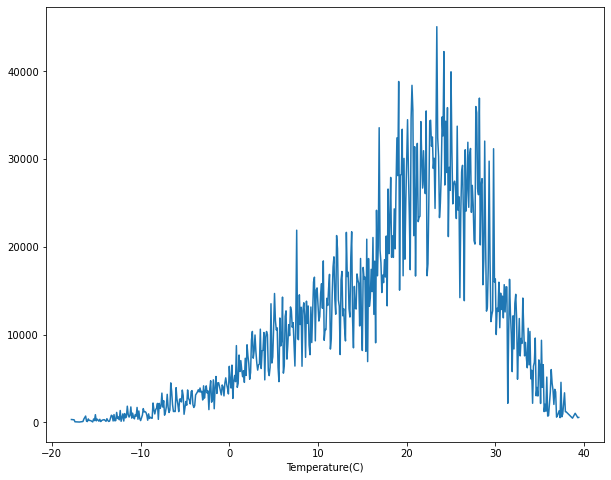

In [20]:
bikepertemp=df.groupby("Temperature(C)")['Rented Bike Count'].sum()
bikepertemp.plot(figsize=(10,8))

Sans grande surprise, dans les extrêmes il y a très peu de location de vélos contrairement aux températures plus propices à la pratique de l'engin à 2 roues

### Nombre total de vélos loués selon la chute de neige

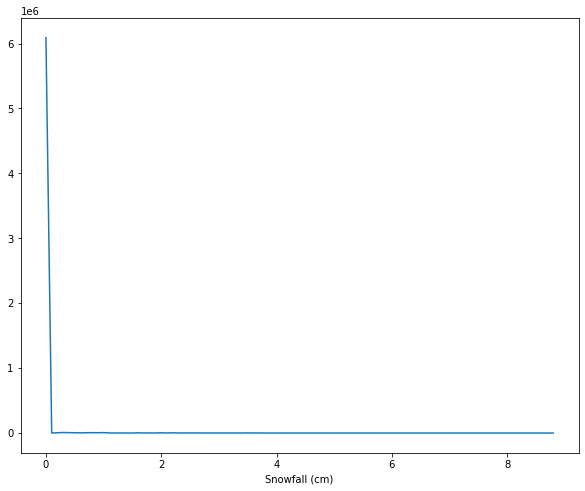

In [21]:
bikepersnow=df.groupby("Snowfall (cm)")['Rented Bike Count'].sum()
bikepersnow.plot(figsize=(10,8))

Quasi aucun vélos sont loués lorsqu'il neige

### Matrice de corrélation des features

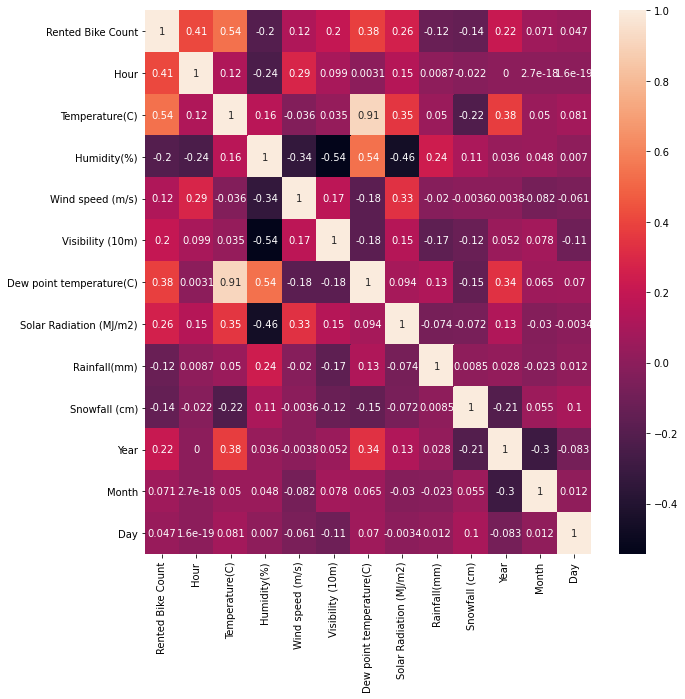

In [49]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

D'après toute l'exploration et la visualisation précedente, ainsi que d'après cette matrice de corrélation, on peut admettre que plusieurs features ont une importance sur le nombre de vélos loués à Séoul.

En effet, nous avons vu que selon l'année, le mois, le jour de la semaine et l'heure de la journée, le nombre de vélos varie énormément. Aussi la température, la neige et la pluie sont des facteurs importants.

La matrice ci-dessus n'affiche que les valeurs numériques néanmoins la saison a aussi sont importance.

On peut conclure qu'en générale tout ce qui est lié à la météo ainsi qu'à l'heure et le jour de la semaine aura une importance sur le nombre de vélos loués par jour et donc sur le nombre de vélos à mettre à disposition.

# Pre-Traitements

In [23]:
df

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day,Day_of_Week
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30,Friday
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30,Friday
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30,Friday
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30,Friday


In [50]:
df.dtypes

Date                        datetime64[ns]
Rented Bike Count                    int64
Hour                                 int64
Temperature(C)                     float64
Humidity(%)                          int64
Wind speed (m/s)                   float64
Visibility (10m)                     int64
Dew point temperature(C)           float64
Solar Radiation (MJ/m2)            float64
Rainfall(mm)                       float64
Snowfall (cm)                      float64
Seasons                             object
Holiday                             object
Functioning Day                     object
Year                                 int64
Month                                int64
Day                                  int64
Day_of_Week                         object
dtype: object

### Transformation de variables

Instinctivement, notre variable cible étant le nombre de vélos loués, on peut partir sur de la prédiction d'une variable continue. Et ainsi de partir sur un modèle de regression.

Pour pouvoir appliquer ce genre de modèle, il est nécessaire d'avoir uniquement que des valeurs numériques dans nos jeux de données. 

Ainsi la transformation qui suit va permettre de :
- remplacer la variable Seasons par 1, 2, 3 ou 4 pour Hiver, Printemps, Ete, Automne
- remplacer la variable Holiday par 1 ou 0 pour Oui ou Non
- remplacer la variable Functioning Day par 1 ou 0 pour Oui ou Non
- remplacer la variable Day_of_Week par 1, 2, 3, 4, 5, 6 ou 7 pour Lundi, Mardi, Mercredi, Jeudi, Vendredi, Samedi, Dimanche

In [7]:
Seasons = []
for index, row in df.iterrows():
    if row['Seasons'] == 'Winter':
        Seasons.append(1)
    if row['Seasons'] == 'Spring':
        Seasons.append(2)
    if row['Seasons'] == 'Summer':
        Seasons.append(3)
    if row['Seasons'] == 'Autumn':
        Seasons.append(4)
        
df['Seasons_id'] = Seasons

Holiday = []
for index, row in df.iterrows():
    if row['Holiday'] == 'Holiday':
        Holiday.append(1)
    if row['Holiday'] == 'No Holiday':
        Holiday.append(0)
        
df['Holiday_id'] = Holiday

FunctioningDay = []
for index, row in df.iterrows():
    if row['Functioning Day'] == 'Yes':
        FunctioningDay.append(1)
    if row['Functioning Day'] == 'No':
        FunctioningDay.append(0)
        
df['FunctioningDay_id'] = FunctioningDay

Day_of_Week = []
for index, row in df.iterrows():
    if row['Day_of_Week'] == 'Monday':
        Day_of_Week.append(1)
    if row['Day_of_Week'] == 'Tuesday':
        Day_of_Week.append(2)
    if row['Day_of_Week'] == 'Wednesday':
        Day_of_Week.append(3)
    if row['Day_of_Week'] == 'Thursday':
        Day_of_Week.append(4)
    if row['Day_of_Week'] == 'Friday':
        Day_of_Week.append(5)
    if row['Day_of_Week'] == 'Saturday':
        Day_of_Week.append(6)
    if row['Day_of_Week'] == 'Sunday':
        Day_of_Week.append(7)
        
df['Day_of_Week_id'] = Day_of_Week

In [8]:
newDF = df.drop(['Seasons', 'Holiday', 'Functioning Day', 'Day_of_Week', 'Date'], axis=1)

In [9]:
newDF

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Year,Month,Day,Seasons_id,Holiday_id,FunctioningDay_id,Day_of_Week_id
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,2017,1,12,1,0,1,4
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,2017,1,12,1,0,1,4
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,2017,1,12,1,0,1,4
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,2017,1,12,1,0,1,4
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,2017,1,12,1,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,2018,11,30,4,0,1,5
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,2018,11,30,4,0,1,5
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,2018,11,30,4,0,1,5
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,2018,11,30,4,0,1,5


### On regarde si nous avons les bons types de variables

On notera le choix d'avoir enlevé la colonne Date car elle était au format DateTime (non supporté dans une regression) et aussi car nous l'avons éclaté en d'autres colonnes, donc l'information n'est pas perdue.

In [13]:
newDF.dtypes

Rented Bike Count             int64
Hour                          int64
Temperature(C)              float64
Humidity(%)                   int64
Wind speed (m/s)            float64
Visibility (10m)              int64
Dew point temperature(C)    float64
Solar Radiation (MJ/m2)     float64
Rainfall(mm)                float64
Snowfall (cm)               float64
Year                          int64
Month                         int64
Day                           int64
Seasons_id                    int64
Holiday_id                    int64
FunctioningDay_id             int64
Day_of_Week_id                int64
dtype: object

Nos données sont prêtes.

# Train & Test Sets

Dans tout problème de Machine Learning où entre en jeu un modèle supervisé, il est necéssaire de divisé nos données en jeux d'entraînement et de test.

Ainsi nous allons pouvoir entraîner ou 'fit' nos modèle sur le train set avant de le tester et de voir ses performances avec des données qu'il ne connaît pas, le test set.

In [10]:
dfNoBike = newDF.drop("Rented Bike Count", axis=1)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
y = newDF['Rented Bike Count']
X_train, X_test, y_train, y_test = train_test_split(dfNoBike, y, test_size=0.3, random_state=19)

In [13]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6132, 16)
(6132,)
(2628, 16)
(2628,)


# Modeles

Dans cette partie, nous allons essayé différents modèles de regression et enregistrer leurs performances afin de pouvoir les comparer facilement.

Les indices d'évaluation que nous avons choisis sont :
- le MSE
- le RMSE
- le MAE
- le R2

In [51]:
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [53]:
all_MSE = []
all_RMSE = []
all_MAE = []
all_R2 = []
noms_modeles = ['Linear Regression', 'Logistic Regression', 'Random Forest Regressor', 'Bayesian Ridge', 'Gradiant Boosting Regressor', 'XGBoost']

### Linear Regression

In [54]:
from sklearn import datasets, linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)

y_pred = regr.predict(X_test)

print('Mean squared error : %.2f'
      % mean_squared_error(y_test, y_pred))
all_MSE.append(mean_squared_error(y_test, y_pred))

print('RMSE : %.2f'
      % sqrt(mean_squared_error(y_test, y_pred)))
all_RMSE.append(sqrt(mean_squared_error(y_test, y_pred)))

print('MAE : %.2f'
      % mean_absolute_error(y_test, y_pred))
all_MAE.append(mean_absolute_error(y_test, y_pred))

print('R2 : %.2f'
      % r2_score(y_test, y_pred))
all_R2.append(r2_score(y_test, y_pred))

Mean squared error : 200458.64
RMSE : 447.73
MAE : 334.25
R2 : 0.54


### Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression
softmax_reg = LogisticRegression(multi_class="multinomial", C=10, class_weight="balanced")
softmax_reg.fit(X_train,y_train)
y_pred = softmax_reg.predict(X_test)

print('Mean squared error : %.2f'
      % mean_squared_error(y_test, y_pred))
all_MSE.append(mean_squared_error(y_test, y_pred))

print('RMSE : %.2f'
      % sqrt(mean_squared_error(y_test, y_pred)))
all_RMSE.append(sqrt(mean_squared_error(y_test, y_pred)))

print('MAE : %.2f'
      % mean_absolute_error(y_test, y_pred))
all_MAE.append(mean_absolute_error(y_test, y_pred))

print('R2 : %.2f'
      % r2_score(y_test, y_pred))
all_R2.append(r2_score(y_test, y_pred))

Mean squared error : 494933.46
RMSE : 703.52
MAE : 501.96
R2 : -0.14


/Users/thomasduv/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Random Forest Regressor

In [56]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train,y_train)

y_pred = regr.predict(X_test)

print('Mean squared error : %.2f'
      % mean_squared_error(y_test, y_pred))
all_MSE.append(mean_squared_error(y_test, y_pred))

print('RMSE : %.2f'
      % sqrt(mean_squared_error(y_test, y_pred)))
all_RMSE.append(sqrt(mean_squared_error(y_test, y_pred)))

print('MAE : %.2f'
      % mean_absolute_error(y_test, y_pred))
all_MAE.append(mean_absolute_error(y_test, y_pred))

print('R2 : %.2f'
      % r2_score(y_test, y_pred))
all_R2.append(r2_score(y_test, y_pred))

Mean squared error : 241498.19
RMSE : 491.42
MAE : 350.56
R2 : 0.44


### Bayesian Ridge

In [57]:
from sklearn.linear_model import BayesianRidge

reg = BayesianRidge()
reg.fit(X_train,y_train)

y_pred = reg.predict(X_test)

print('Mean squared error : %.2f'
      % mean_squared_error(y_test, y_pred))
all_MSE.append(mean_squared_error(y_test, y_pred))

print('RMSE : %.2f'
      % sqrt(mean_squared_error(y_test, y_pred)))
all_RMSE.append(sqrt(mean_squared_error(y_test, y_pred)))

print('MAE : %.2f'
      % mean_absolute_error(y_test, y_pred))
all_MAE.append(mean_absolute_error(y_test, y_pred))

print('R2 : %.2f'
      % r2_score(y_test, y_pred))
all_R2.append(r2_score(y_test, y_pred))

Mean squared error : 200484.61
RMSE : 447.76
MAE : 334.18
R2 : 0.54


### Gradient Boosting Regressor

In [58]:
from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print('Mean squared error : %.2f'
      % mean_squared_error(y_test, y_pred))
all_MSE.append(mean_squared_error(y_test, y_pred))

print('RMSE : %.2f'
      % sqrt(mean_squared_error(y_test, y_pred)))
all_RMSE.append(sqrt(mean_squared_error(y_test, y_pred)))

print('MAE : %.2f'
      % mean_absolute_error(y_test, y_pred))
all_MAE.append(mean_absolute_error(y_test, y_pred))

print('R2 : %.2f'
      % r2_score(y_test, y_pred))
all_R2.append(r2_score(y_test, y_pred))

Mean squared error : 64448.35
RMSE : 253.87
MAE : 169.41
R2 : 0.85


### XGBoost

In [59]:
from xgboost import XGBRegressor
algo = XGBRegressor()
algo.fit(X_train, y_train)
y_pred = algo.predict(X_test)

print('Mean squared error : %.2f'
      % mean_squared_error(y_test, y_pred))
all_MSE.append(mean_squared_error(y_test, y_pred))

print('RMSE : %.2f'
      % sqrt(mean_squared_error(y_test, y_pred)))
all_RMSE.append(sqrt(mean_squared_error(y_test, y_pred)))

print('MAE : %.2f'
      % mean_absolute_error(y_test, y_pred))
all_MAE.append(mean_absolute_error(y_test, y_pred))

print('R2 : %.2f'
      % r2_score(y_test, y_pred))
all_R2.append(r2_score(y_test, y_pred))

Mean squared error : 37792.40
RMSE : 194.40
MAE : 118.40
R2 : 0.91


### Comparaison des modèles

In [63]:
resultsDF = pd.DataFrame()
resultsDF['Modele'] = noms_modeles
resultsDF['MSE'] = all_MSE
resultsDF['RMSE'] = all_RMSE
resultsDF['MAE'] = all_MAE
resultsDF['R2'] = all_R2

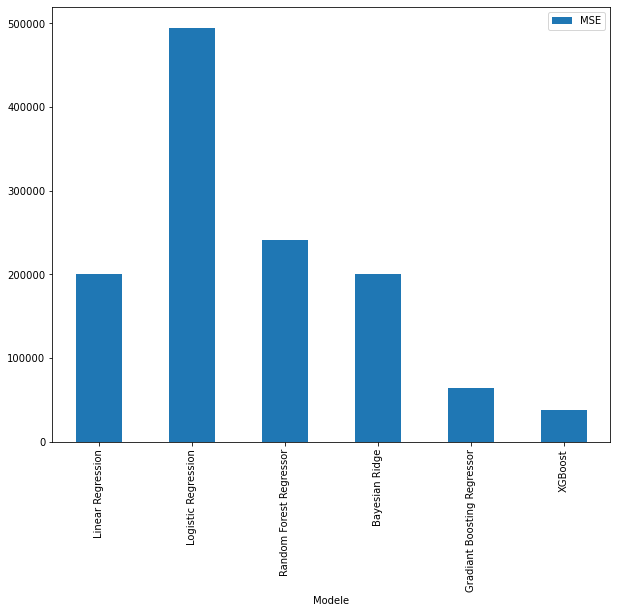

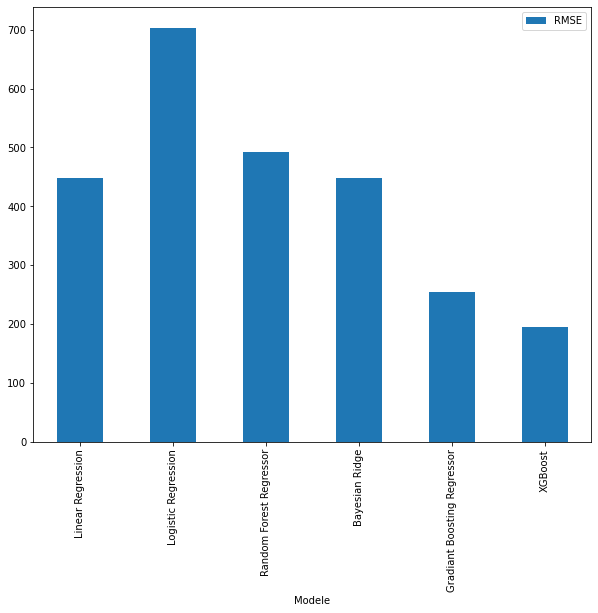

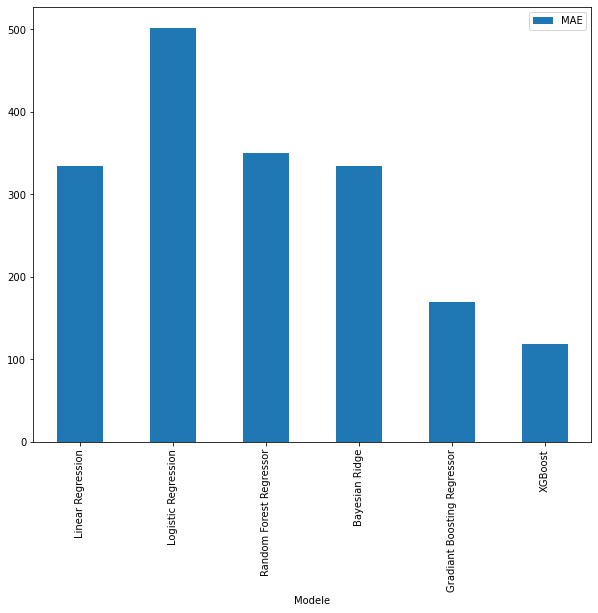

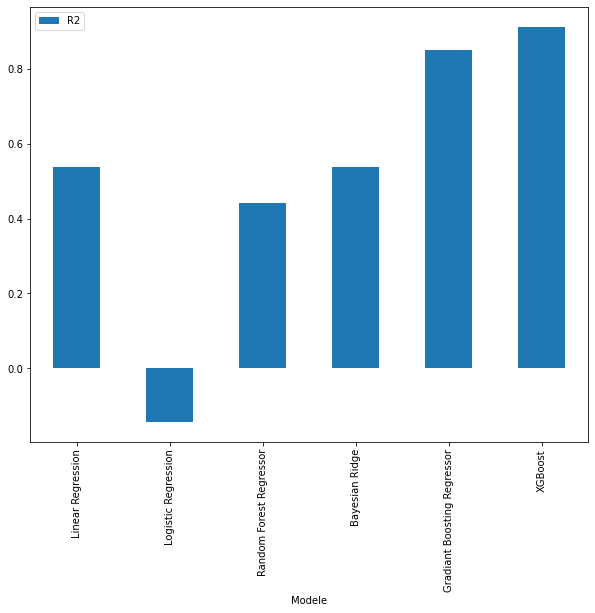

In [75]:
resultsDF.plot(figsize=(10,8), x='Modele', y='MSE', kind='bar')
resultsDF.plot(figsize=(10,8), x='Modele', y='RMSE', kind='bar')
resultsDF.plot(figsize=(10,8), x='Modele', y='MAE', kind='bar')
resultsDF.plot(figsize=(10,8), x='Modele', y='R2', kind='bar')

In [78]:
resultsDF.sort_values(by='R2', ascending=False)

,Modele,MSE,RMSE,MAE,R2
5,XGBoost,37792.402516,194.402681,118.400012,0.912676
4,Gradiant Boosting Regressor,64448.354268,253.866804,169.406657,0.851084
0,Linear Regression,200458.636045,447.726073,334.254477,0.536815
3,Bayesian Ridge,200484.608896,447.755077,334.178487,0.536755
2,Random Forest Regressor,241498.194923,491.424658,350.559485,0.441988
1,Logistic Regression,494933.458904,703.515074,501.962709,-0.143606


### Interprétation

Pour choisir le meilleur modèle pour notre problème on regarde nos différents indices. On cherche le modèle qui a le MSE, RMSE et MAE le plus bas ainsi que le R2 le plus haut.

Le modèle qui montre les meilleures performances est le XGBoost Regressor.

## Optimisation du modèle choisi

Maintenant que nous avons trouvons notre modèle nous allons essayer de l'optimiser grâce à un Grid Search.

On fait varier certains hyperparamètres de notre modèle afin de selectionner les meilleurs.

In [81]:
from sklearn.model_selection import GridSearchCV

In [90]:
parametres = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
             "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
             "min_child_weight" : [ 1, 3, 5, 7 ],
             "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
             "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }
grid = GridSearchCV(algo, parametres)
grid.fit(X_train, y_train)
print (grid.best_score_, grid.best_estimator_)

0.9185852626465696 XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.3, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.15, max_delta_step=0, max_depth=8,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)


Avec les paramètres ci-dessus, on obtient un R2 supérieur à précédemment.

## Modèle final

In [80]:
from xgboost import XGBRegressor
xgbmodel = XGBRegressor(learning_rate=0.15, max_depth=8, min_child_weight=1, gamma=0.3, colsample_bytree=0.7)
xgbmodel.fit(X_train, y_train)
y_pred = xgbmodel.predict(X_test)

print('Performances avant optimisation : ')
print('Mean squared error : %.2f'
      % resultsDF.iloc[5]['MSE'])

print('RMSE : %.2f'
      % resultsDF.iloc[5]['RMSE'])

print('MAE : %.2f'
      % resultsDF.iloc[5]['MAE'])

print('R2 : %.2f'
      % resultsDF.iloc[5]['R2'])

print('-'*60)

print('Performances après optimisation : ')
print('Mean squared error : %.2f'
      % mean_squared_error(y_test, y_pred))

print('RMSE : %.2f'
      % sqrt(mean_squared_error(y_test, y_pred)))

print('MAE : %.2f'
      % mean_absolute_error(y_test, y_pred))

print('R2 : %.2f'
      % r2_score(y_test, y_pred))

Performances avant optimisation : 
Mean squared error : 37792.40
RMSE : 194.40
MAE : 118.40
R2 : 0.91
------------------------------------------------------------
Performances après optimisation : 
Mean squared error : 35437.49
RMSE : 188.25
MAE : 110.63
R2 : 0.92


Nous avons un modèle performant que nous garderons pour l'API.

## Exportation pour l'API

In [81]:
import pickle
pickle.dump(xgbmodel, open('xgbmodel.pickle', 'wb'))